# Tarea Final (1 Semana)
**Curso:** Métodos Estadísticos / Machine Learning - Universidad del Desarrollo
**Dataset:** Online Shoppers Purchasing Intention Dataset (UCI/ Kaggle)

## Propósito (Metodología TILT)
Al finalizar esta tarea, el estudiante será capaz de:
* Diagnosticar colinealidad mediante matrices de correlación y heatmaps triangulares.
* Seleccionar variables representativas para análisis inferencial y predictivo.
* Ajustar modelos supervisados lineales y probabilísticos (RegLog, LDA, KNN, Naive Bayes).
* Evaluar significancia estadística mediante regresión logística con statsmodels.
* Visualizar fronteras de decisión en dos dimensiones usando variables originales.
* Aplicar modelos no supervisados (K-means, GMM, clustering jerárquico, SOM).
* Integrar conclusiones para proponer estrategias accionables de negocio.

---

## Tareas

### 1. Exploración y Diagnóstico de Datos
Utilice el dataset **Online Shoppers Purchasing Intention Dataset**.

* **1.1** Describa brevemente las variables del dataset y en especial la variable objetivo **Revenue**.
* **1.2** Calcule la matriz de correlación y genere un heatmap triangular:
    * Triángulo inferior: colores de correlación.
    * Triángulo superior: valores numéricos en formato compacto.
* **1.3** Identifique bloques de colinealidad e indique una variable representativa por cada bloque (ideal: 6-10 variables). Justifique su selección.

### 2. Modelos Supervisados

#### 2.1 Regresión Logística (Enfoque Predictivo con sklearn)
Usando las variables seleccionadas:
* **2.1.1** Construya un pipeline con StandardScaler.
* **2.1.2** Entrene el modelo y evalúe:
    * Accuracy
    * Precision
    * Recall
    * F1
    * AUC
    * Matriz de confusión
* **2.1.3** Interprete los resultados brevemente.

#### 2.2 Regresión Logística (Enfoque Inferencial con statsmodels)
Usando las mismas variables seleccionadas:
* **2.2.1** Ajuste un modelo Logit con statsmodels.
* **2.2.2** Reporte coeficientes, errores estándar, estadístico z y p-valores.
* **2.2.3** Comente: ¿Coinciden los resultados inferenciales con los resultados predictivos?

#### 2.3 Modelos Comparativos
Entrene los siguientes modelos usando las variables seleccionadas:
* **LDA**
* **KNN** (con GridSearchCV para k y weights)
* **Naive Bayes Gaussiano** (GaussianNB)

Para cada modelo:
* **2.3.1** Entrene usando train/test.
* **2.3.2** Evalúe las métricas anteriores.
* **2.3.3** Muestre la matriz de confusión.
* **2.3.4** Discuta cuál modelo detecta mejor la clase positiva (Revenue $=1$) y por qué.

### 3. Fronteras de Decisión (2 Variables Originales)
* **3.1** Seleccione dos variables originales (no transformadas) que sean relevantes.
* **3.2** Visualice:
    * Frontera de decisión de la regresión logística.
    * Áreas de clasificación del modelo Naive Bayes (usando GaussianNB).
* **3.3** Comente diferencias geométricas entre modelos lineales y probabilísticos gaussianos.

### 4. Modelos No Supervisados

#### 4.1 K-means
* **4.1.1** Evalúe $k=2,...,10$.
* **4.1.2** Seleccione $k$ según el método del codo y el silhouette promedio.
* **4.1.3** Grafique y describa los clusters encontrados.

#### 4.2 Gaussian Mixture Models
* **4.2.1** Evalúe 2-8 componentes.
* **4.2.2** Seleccione el modelo usando BIC y AIC.
* **4.2.3** Grafique los clusters probabilísticos.

#### 4.3 Clustering Jerárquico
* **4.3.1** Genere un dendrograma utilizando enlace Ward.
* **4.3.2** Seleccione una cantidad razonable de clusters y descríbalos.

#### 4.4 Self-Organizing Maps (SOM)
* **4.4.1** Entrene un SOM utilizando MiniSom.
* **4.4.2** Muestre:
    * U-Matrix.
    * Mapa de hits.
    * Distribución de Revenue en el mapa.

### 5. Integración Final
* **5.1** Resuma qué variables resultaron más relevantes.
* **5.2** Compare desempeño entre modelos lineales, LDA, KNN y Naive Bayes.
* **5.3** Relacione los clusters con la variable Revenue.
* **5.4** Proponga tres acciones de negocio basadas en sus hallazgos.

---

## Criterios de Evaluación (20 puntos)

| Criterio | Pts |
| :--- | :--- |
| Exploración + análisis de colinealidad | 3 |
| Regresión logística (sklearn + statsmodels) | 4 |
| Modelos comparativos (LDA, KNN, Naive Bayes) | 4 |
| Fronteras de decisión 2D | 2 |
| Modelos no supervisados (K-means, GMM, Jerárquico, SOM) | 5 |
| Integración final + acciones de negocio | 2 |
| **Total** | **20** |

In [1]:
# Instalación de Librerías Necesarias

!pip install kagglehub --quiet
!pip install os --quiet
!pip install shutil --quiet

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os
ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [2]:
# Importar Librerías Necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Lectura de Dasaset

df = pd.read_csv('Data/online_shoppers_intention.csv')

### 1. Exploración y Diagnóstico de Datos
Utilice el dataset **Online Shoppers Purchasing Intention Dataset**.

In [4]:
display(df.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
print(df.info())    # Muestra los nombres, tipos de datos y valores no nulos.
display(df.describe()) # Muestra estadísticas descriptivas (media, min, max, cuartiles) para columnas numéricas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


* **1.1** Describa brevemente las variables del dataset y en especial la variable objetivo **Revenue**.



**Administrative**:
Este es el número de páginas de este tipo (administrativas) que visitó el usuario.


**Administrative_Duration**:
Esta es la cantidad de tiempo dedicado a esta categoría de páginas.


**Informational**:
Este es el número de páginas de este tipo (informativas) que visitó el usuario.


**Informational_Duration**:
Esta es la cantidad de tiempo dedicado a esta categoría de páginas.


**ProductRelated**:
Este es el número de páginas de este tipo (relacionadas con productos) que visitó el usuario.


**ProductRelated_Duration**:
Esta es la cantidad de tiempo dedicado a esta categoría de páginas.


**BounceRates**:
El porcentaje de visitantes que ingresan al sitio web a través de esa página y salen sin activar ninguna tarea adicional.


**ExitRates**:
El porcentaje de páginas vistas en el sitio web que terminan en esa página específica.


**PageValues**:
El valor promedio de la página se promedió sobre el valor de la página de destino y/o la finalización de un comercio electrónico


**SpecialDay**:
Este valor representa la cercanía de la fecha de navegación a días especiales o festivos

**Month**:
Mes 

**OperatingSystems**:
Sistema operativo usado

**Browser**:
Navegador web utilizado de usuario

**Region**:
Región del usuario

**TrafficType**:
Tipo de tráfico (Correspondiente a un canal de tráfico)

**VisitorType**:
Tipo de visitante (Usuario Nuevo, Recurrente u Otro)

**Weekend**:
Si la visita corresponde durante fin de semana

### **Revenue**:
Si el usuario efectivamente generó una coversión, generando ingresos durante su sesión (True o False)


### Limpieza del Dataframe

In [7]:
def clean_and_prep_dataset(df_raw):
    """
    Realiza una limpieza exhaustiva del dataset:
    1. Elimina duplicados.
    2. Normaliza formatos de texto.
    3. Convierte tipos de datos.
    4. Elimina outliers extremos (percentil 99).
    """
    df = df_raw.copy()
    
    # --- 1. Eliminación de Duplicados ---
    rows_initial = len(df)
    df = df.drop_duplicates()
    print(f"✅ Duplicados eliminados: {rows_initial - len(df)}")
    
    # --- 2. Normalización de Formatos ---
    # Estandarizar 'June' a 'Jun' para coincidir con el resto (Feb, Mar, etc.)
    df['Month'] = df['Month'].replace('June', 'Jun')
    print("✅ Formato de meses normalizado.")
    
    # --- 3. Conversión de Tipos ---
    # Convertir booleanos a enteros (0 y 1) para correlación y modelos
    bool_cols = ['Weekend', 'Revenue']
    for col in bool_cols:
        df[col] = df[col].astype(int)
    print("✅ Variables booleanas convertidas a numéricas (0/1).")
    
    # --- 4. Tratamiento de Outliers (Filtrado p99) ---
    # Variables numéricas críticas propensas a outliers
    numeric_cols = ['Administrative_Duration', 'Informational_Duration', 
                    'ProductRelated_Duration', 'PageValues']
    
    print("\n--- Limpieza de Outliers (Corte al percentil 99) ---")
    rows_before_outliers = len(df)
    
    for col in numeric_cols:
        # Calculamos el límite superior (percentil 99)
        limit = df[col].quantile(0.99)
        
        # Filtramos los datos que están dentro del límite
        df = df[df[col] <= limit]
    
    print(f"✅ Registros extremos eliminados: {rows_before_outliers - len(df)}")
    print(f"📉 Tamaño final del dataset: {len(df)} filas (Original: {rows_initial})")
    
    return df

# --- EJECUCIÓN ---
# Cargar datos (asumiendo que ya tienes el csv cargado o en ruta)
# df_raw = pd.read_csv('online_shoppers_intention.csv') # Descomentar si necesitas cargar
df_cleaned = clean_and_prep_dataset(df)

# Vista previa
df_cleaned.head()

✅ Duplicados eliminados: 125
✅ Formato de meses normalizado.
✅ Variables booleanas convertidas a numéricas (0/1).

--- Limpieza de Outliers (Corte al percentil 99) ---
✅ Registros extremos eliminados: 483
📉 Tamaño final del dataset: 11722 filas (Original: 12330)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


* **1.2** Calcule la matriz de correlación y genere un heatmap triangular:


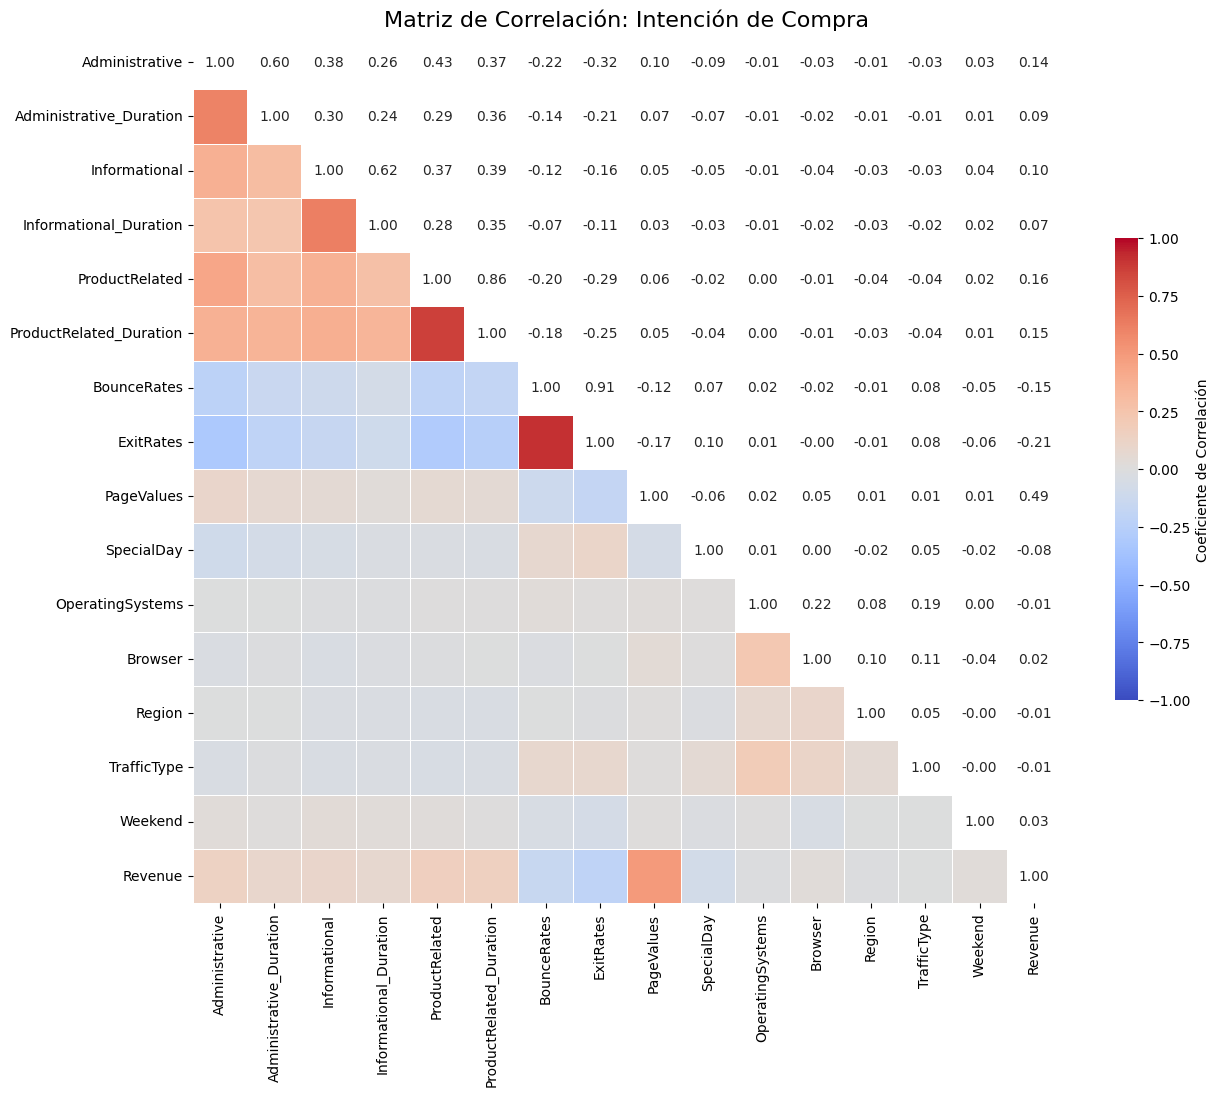

In [ ]:
#Para que Revenue y Weekend entren en la correlación, los pasamos a 0 y 1.
df_corr = df_cleaned.copy()
df_corr['Revenue'] = df_corr['Revenue'].astype(int)
df_corr['Weekend'] = df_corr['Weekend'].astype(int)

# Seleccionamos solo las columnas numéricas para la matriz
numeric_cols = df_corr.select_dtypes(include=[np.number]).columns
correlation_matrix = df_corr[numeric_cols].corr()

# 2. Configuración del Gráfico
plt.figure(figsize=(14, 12))
plt.title("Matriz de Correlación: Intención de Compra", fontsize=16)

# --- TRUCO PARA EL HEATMAP MIXTO ---

# Máscara para ocultar el triángulo SUPERIOR (para el mapa de calor)
mask_upper = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Máscara para ocultar el triángulo INFERIOR (para los números)
mask_lower = ~mask_upper

# CAPA 1: Triángulo INFERIOR con COLORES
sns.heatmap(
    correlation_matrix,
    mask=mask_upper,        # Ocultamos la parte de arriba
    cmap='coolwarm',        # Mapa de color (Rojo=Positivo, Azul=Negativo)
    vmax=1, vmin=-1, center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5, "label": "Coeficiente de Correlación"},
    annot=False             # Sin números aquí
)

# CAPA 2: Triángulo SUPERIOR con NÚMEROS (Fondo blanco/transparente)
# Usamos un mapa de color personalizado que sea todo blanco para no interferir
from matplotlib.colors import ListedColormap
white_cmap = ListedColormap(['white'])

sns.heatmap(
    correlation_matrix,
    mask=mask_lower,        # Ocultamos la parte de abajo
    cmap=white_cmap,        # Fondo blanco
    annot=True,             # ¡Aquí sí ponemos los números!
    fmt=".2f",              # Formato compacto (2 decimales)
    cbar=False,             # Sin barra de color extra
    square=True,
    linewidths=.5,
    linecolor='white'       # Líneas sutiles
)

plt.show()